In [1]:
from sklearn import preprocessing

import numpy as np

import data_source as ds
import GAN

def load_data(params,dataset):
    X, _ = ds.load_data(params,dataset)
    return X

params = GAN.get_params(name='Loc_analysis',log_name='Loc_analysis',FX_sel='basic')

features = ds.FEATURES[params['FX_sel']]
locations = ['bag','hand','hips','torso']

data = []

for loc in locations:
    params['location'] = loc
    X = load_data(params,'validation')
    data.append([np.mean(X,axis=0),np.std(X,axis=0)])

params['location'] = 'test'    
X = load_data(params,'test')
data.append([np.mean(X,axis=0),np.std(X,axis=0)])

data = np.array(data)
print(data.shape)

2020-06-10_19:22:56 | Loading dataset validation.. (Location: bag | FX: basic)
2020-06-10_19:22:57 | Dataset validation (bag) loaded.
2020-06-10_19:22:57 | Loading dataset validation.. (Location: hand | FX: basic)
2020-06-10_19:22:57 | Dataset validation (hand) loaded.
2020-06-10_19:22:57 | Loading dataset validation.. (Location: hips | FX: basic)
2020-06-10_19:22:58 | Dataset validation (hips) loaded.
2020-06-10_19:22:58 | Loading dataset validation.. (Location: torso | FX: basic)
2020-06-10_19:22:58 | Dataset validation (torso) loaded.
2020-06-10_19:22:58 | Loading dataset test.. (Location: test | FX: basic)
2020-06-10_19:22:59 | Dataset test (test) loaded.
(5, 2, 100)


In [2]:
def normalize(data):
    ''' x normalized = (x – x minimum) / (x maximum – x minimum) '''
    
    feat = data.shape[2]
    mode = data.shape[1]
    loc = data.shape[0]
    
    data_new = np.zeros_like(data)
    
    for y in range(mode):
        for z in range(feat):
            x_min = data[:,y,z].min()
            x_max = data[:,y,z].max()
            data_new[:,y,z] = (data[:,y,z]-x_min)/((x_max-x_min))
    return data_new
    
def standardize(data):
    ''' x standardized = (x – u) / o '''
    
    feat = data.shape[2]
    mode = data.shape[1]
    loc = data.shape[0]
    
    data_new = np.zeros_like(data)
    
    for y in range(mode):
        for z in range(feat):
            u = data[:,y,z].mean()
            o = data[:,y,z].std()
            if o == 0.0:
                data_new[:,y,z] = np.zeros_like(data[:,y,z])
                print(data[:,y,z],u,o)
            else:
                data_new[:,y,z] = (data[:,y,z]-u)/o
    return data_new 

In [3]:
data_norm = normalize(data)
data_stand = standardize(data)

In [4]:
import matplotlib.pyplot as plt

from network import save_fig

def plot(data,name):
    x = range(1,data.shape[2]+1)

    for sub in data:
        plt.errorbar(x, sub[0], sub[1], linestyle='None', marker='x',alpha=0.8)

    plt.legend(locations+['target'])
    plt.xlabel('Feature')
    plt.ylabel('Value')

    plt.xlim(0,data.shape[2]+1)

    plt.grid()
    fig = plt.gcf()
    plt.show()

    save_fig(params,name,fig)

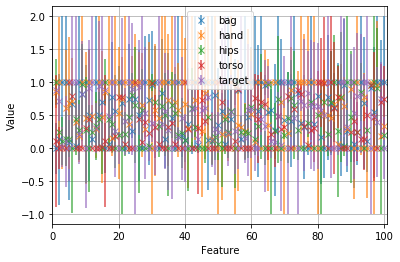

In [5]:
plot(data_norm,'normalized')

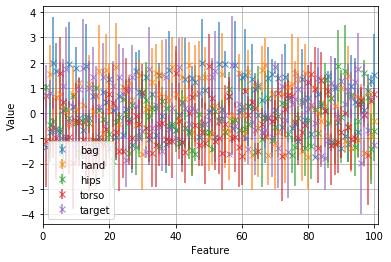

In [6]:
plot(data_stand,'standardized')

In [7]:
def calc_dis(data):
    tar = data[len(locations),0]
    for i,loc in enumerate(locations):
        X = data[i,0]
        diff = np.sum((tar-X)**2)**(0.5)
        print(" - diff:",loc,'=',diff)

print("Normalize")
calc_dis(data_norm)
print("\nStandardize")
calc_dis(data_stand)

Normalize
 - diff: bag = 6.393576074648117
 - diff: hand = 5.272772081023107
 - diff: hips = 5.1459939357697495
 - diff: torso = 6.306898011754961

Standardize
 - diff: bag = 17.468795365337296
 - diff: hand = 14.700194777107107
 - diff: hips = 14.410507920293007
 - diff: torso = 17.09570117553424
